# ECE 537 Final Project - Counting Trees
## Nathan Bagnall

## First Download Yellowstone Data from NEON

In [1]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

base = importr('base')
utils = importr('utils')
stats = importr('stats')

utils.install_packages('neonUtilities', repos='https://cran.rstudio.com/');

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘downloader’, ‘R.utils’, ‘pbapply’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/R.oo_1.24.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 383514 bytes (374 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

In [2]:
neonUtilities = importr('neonUtilities')

neonUtilities.byFileAOP(dpID='DP3.30010.001', site='YELL',

                        year='2019', check_size='TRUE',
                       savepath='/content/NEON_YELL_2019');

Continuing will download 299 files totaling approximately 20.207380031 GB. Do you want to proceed y/n: y
  |======================================================================| 100%
Successfully downloaded  299  files.
2019_YELL_2_530000_4969000_image.tif downloaded to /content/NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic
2019_YELL_2_538000_4972000_image.tif downloaded to /content/NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic
2019_YELL_2_531000_4976000_image.tif downloaded to /content/NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic
2019_YELL_2_548000_4977000_image.tif downloaded to /content/NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic
2019_YELL_2_540000_4975000_image.tif downloaded to /content/NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic
2019_YELL_2_540000_4981000_image.tif downloaded to /content/NEON_YELL_2019/DP3.30010.001/2019/Full

## Initial Data Analysis

### View an Image from the Dataset

In [4]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


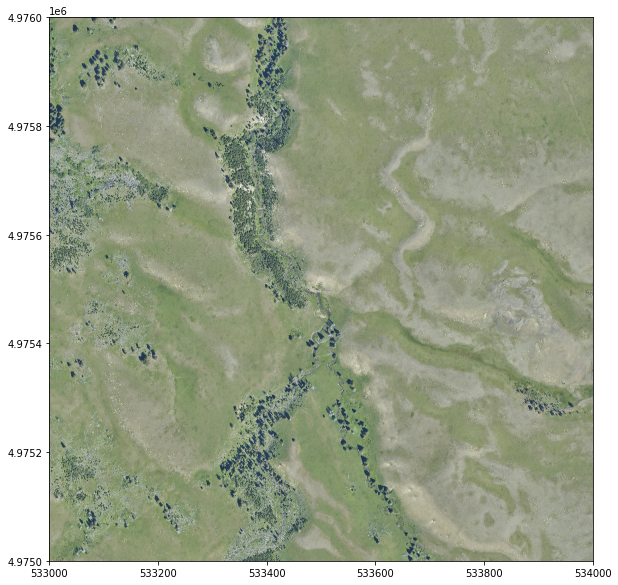

In [6]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.plot import show
%matplotlib inline

#plotting a single image from the dataset
tile = rasterio.open('NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic/2019_YELL_2_533000_4975000_image.tif')
fig, ax = plt.subplots(figsize=(10, 10))
show(tile)

### Import Bounding Box Data

In [ ]:
!wget(https://zenodo.org/record/3765872/files/YELL_2019.csv?download=1)

In [7]:
#importing bounding box data - manually upload this from https://zenodo.org/record/3765872#.XxGvDmhKiUk
bbox = pd.read_csv('YELL_2019.csv')

print(bbox.head())

   Unnamed: 0      left     bottom  ...       geo_index    Year  Site
0           0  533482.4  4975316.0  ...  533000_4975000  2019.0  YELL
1           1  533081.7  4975989.3  ...  533000_4975000  2019.0  YELL
2           2  533062.7  4975866.9  ...  533000_4975000  2019.0  YELL
3           3  533061.1  4975015.2  ...  533000_4975000  2019.0  YELL
4           4  533050.3  4975011.3  ...  533000_4975000  2019.0  YELL

[5 rows x 13 columns]


### View Bounding Boxes on One Image

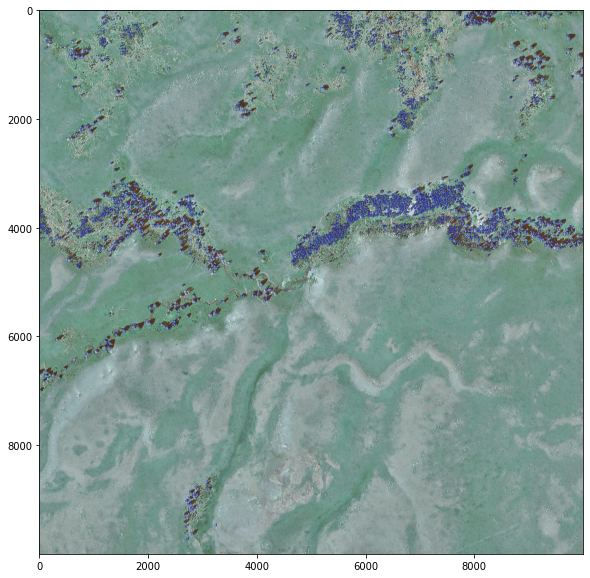

In [8]:
import cv2
%matplotlib inline

#group data by shp_path
bbox_image = bbox.groupby('shp_path')

#grab a group
test_image = bbox_image.get_group('/orange/idtrees-collab/draped/2019_YELL_2_533000_4975000_image.shp')

#get corresponding image path
image_path = 'NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic/2019_YELL_2_533000_4975000_image.tif'

#import corresponding image, rotate it 90 degrees clockwise
image = cv2.imread(image_path)
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

#image coordinates to bias bounding boxes
x_loc = 533000
y_loc = 4975000

#for each item in test image
for index, row in test_image.iterrows():
    #draw rectangle based on coordinates
    #make sure to use integers for opencv, scale by 10x
    start_pt = (int(row['top'] - y_loc)*10, int(row['left'] - x_loc)*10)
    end_pt = (int(row['bottom'] - y_loc)*10, int(row['right'] - x_loc)*10)
    #draw bounding box
    cv2.rectangle(image, start_pt, end_pt, (0, 0, 255), 2)

#show image with boxes
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(image)

#### Zooming in for a closer look

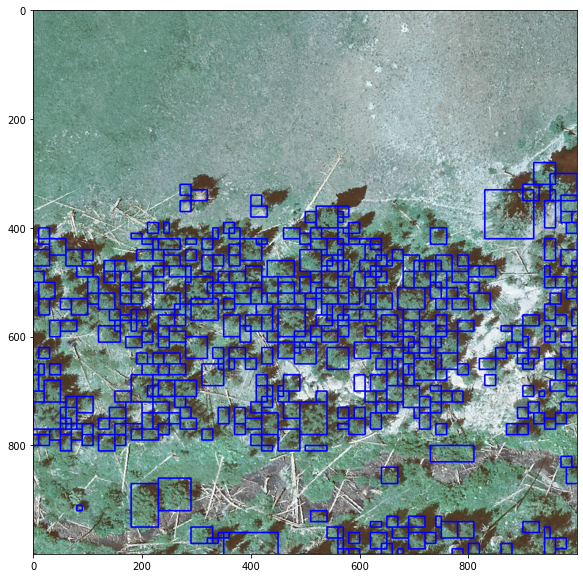

In [9]:
#crop image to see a bounding box
x = 6000
y = 3000
h = 1000
w = 1000
crop_img = image[y:y+h, x:x+w].copy()

plt.imshow(crop_img)

Looking good, now to process the data for model creation

## Data Ingest

In [37]:
import os
from PIL import Image

def get_bb(row, x_loc, y_loc):
    """Returns correct format of bb for create_mask from dataframe row"""
    return np.array(row.bottom - y_loc, row.left - x_loc, row.top - y_loc, row.right - x_loc)

def load_image(df, group):
    """Returns image from dataframe group"""
    path = get_image_path(df, group)
    image = cv2.imread(path)
    image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    return image

def create_mask(df, group, scale_f = 10, accuracy_threshold = 0.3):
    """Creates a mask for the bounding boxes"""
    #get image dimensions
    h, w = image.shape[:2]
    #create mask
    mask = np.zeros((h, w), np.uint8)
    #draw rectangles
    test_image = df.get_group(group)

    #get coordinate scale
    x_loc, y_loc = get_coordinates(df, group)

    for _, row in test_image.iterrows():
        #draw rectangle based on coordinates
        #make sure to use integers for opencv, scale by scale factor
        #skip if accuracy is too low
        if row['score'] > accuracy_threshold:  
            start_pt = (int(row['top'] - y_loc)*scale_f, int(row['left'] - x_loc)*scale_f)
            end_pt = (int(row['bottom'] - y_loc)*scale_f, int(row['right'] - x_loc)*scale_f)
            #draw bounding box
            cv2.rectangle(mask, start_pt, end_pt, 255, -1)
            top = int(row['top'] - y_loc)*scale_f
            left = int(row['left'] - x_loc)*scale_f
            bottom = int(row['bottom'] - y_loc)*scale_f
            right = int(row['right'] - x_loc)*scale_f
            mask[bottom:top, left:right] = 1

    return mask

def get_image_path(df, group):
    """Returns image path from dataframe row"""
    #get first path
    path = df.get_group(group)['shp_path'].iloc[0]
    name = path.split('/')[-1]
    #replace .shp with .tif from image name
    image_name = name.replace('.shp', '.tif')
    #add local path to image name
    image_path = 'NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic/' + image_name
    return image_path

def get_coordinates(df, group):
    """Returns coordinates from dataframe group"""
    path = get_image_path(df, group)

    #get coordinate numbers from image_name of overall geographic location
    x_loc = int(path.split('_')[-3])
    y_loc = int(path.split('_')[-2])

    return x_loc, y_loc

def mask_path(df, group):
    x_loc, y_loc = get_coordinates(df, group)

    #return path
    return 'processed_data/masks/2019_YELL_2_' + str(x_loc) + '_' + str(y_loc) + 'mask.png'

def rotateImages(rotationAmt, dir, quantity):
  i = 0
  # for each image in the current directory
  for image in os.listdir(dir):
    if i < quantity:
      # open the image
      img = Image.open(dir + str('/') + image)
      # rotate and save the image with the same filename
      img.rotate(rotationAmt).save(dir + str('/') + image)
      # close the image
      img.close()
    i+=1

### Test Mask Creation

True

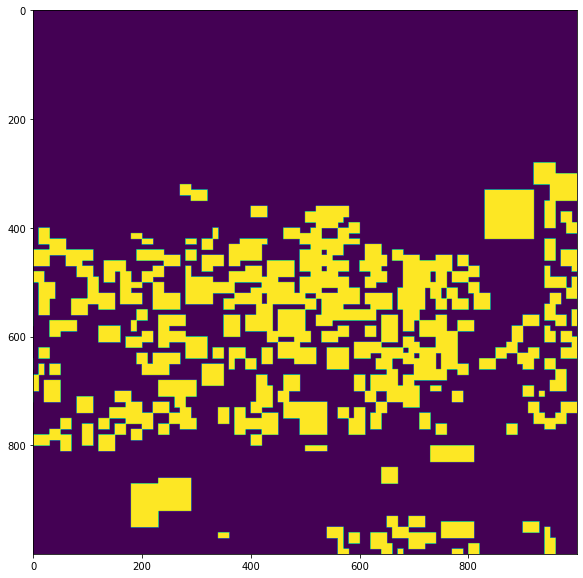

In [19]:
#testing mask creation
image_path = get_image_path(bbox_image, '/orange/idtrees-collab/draped/2019_YELL_2_533000_4975000_image.shp')

mask = create_mask(bbox_image, '/orange/idtrees-collab/draped/2019_YELL_2_533000_4975000_image.shp')

#crop image to see a bounding box
x = 6000
y = 3000
h = 1000
w = 1000
crop_img = mask[y:y+h, x:x+w].copy()

plt.imshow(crop_img)


#get coordinates
x_loc, y_loc = get_coordinates(bbox_image, '/orange/idtrees-collab/draped/2019_YELL_2_533000_4975000_image.shp')

cv2.imwrite(mask_path(bbox_image, '/orange/idtrees-collab/draped/2019_YELL_2_533000_4975000_image.shp'), mask)

### Creating Mask for each Image

In [20]:
#get list of unique shp_paths (each image)
shp_paths = bbox_image.groups.keys()

#list masks created
created_masks = []

#only do first 5 due to quantity of data
i = 0
#looping through each group
for group in shp_paths:
    if i < 5:
      image_path = get_image_path(bbox_image, group)
      mask = create_mask(bbox_image, group)

      #get coordinates
      x_loc, y_loc = get_coordinates(bbox_image, group)

      #get path to save mask to
      path = mask_path(bbox_image, group)

      cv2.imwrite(path, mask)
      created_masks.append(path)

    i+=1

### Resizing Images and Masks from 10000x10000 to Useable Size Tiles

In [21]:
!pip install image_slicer

     |████████████████████████████████| 2.2 MB 5.4 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [38]:
#rotate images before splitting into tiles
rotateImages(90, 'NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic', 5)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  ((1, 1), ">i2"): ("I", "I;16BS"),


In [22]:
import image_slicer

#test image
image_path = get_image_path(bbox_image, '/orange/idtrees-collab/draped/2019_YELL_2_533000_4975000_image.shp')
tiles = image_slicer.slice(image_path, 200, save=False)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  ((1, 1), ">i2"): ("I", "I;16BS"),


In [39]:
#breaking up all images
#only do first 5 due to data size
i = 0
for group in shp_paths:
  if i < 5:
    image_path = get_image_path(bbox_image, group)
    tiles = image_slicer.slice(image_path, 200, save=True)
  i+=1

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  ((1, 1), ">i2"): ("I", "I;16BS"),


In [40]:
#move created tiles
import os
import shutil
sourcepath='NEON_YELL_2019/DP3.30010.001/2019/FullSite/D12/2019_YELL_2/L3/Camera/Mosaic/'
sourcefiles = os.listdir(sourcepath)
destinationpath = 'processed_data/images'
for file in sourcefiles:
    if file.endswith('.png'):
        shutil.move(os.path.join(sourcepath,file), os.path.join(destinationpath,file))

In [42]:
import glob

#breaking up all masks
for image in glob.glob('processed_data/masks/*.png'):
    tiles = image_slicer.slice(image, 200, save=True)

#remove original masks
for f in created_masks:
   os.remove(f)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  ((1, 1), ">i2"): ("I", "I;16BS"),


In [60]:
masks = list(sorted(os.listdir(os.path.join(root, "masks"))))
print(masks)

['.ipynb_checkpoints', '2019_YELL_2_528000_4975000mask_01_01.png', '2019_YELL_2_528000_4975000mask_01_02.png', '2019_YELL_2_528000_4975000mask_01_03.png', '2019_YELL_2_528000_4975000mask_01_04.png', '2019_YELL_2_528000_4975000mask_01_05.png', '2019_YELL_2_528000_4975000mask_01_06.png', '2019_YELL_2_528000_4975000mask_01_07.png', '2019_YELL_2_528000_4975000mask_01_08.png', '2019_YELL_2_528000_4975000mask_01_09.png', '2019_YELL_2_528000_4975000mask_01_10.png', '2019_YELL_2_528000_4975000mask_01_11.png', '2019_YELL_2_528000_4975000mask_01_12.png', '2019_YELL_2_528000_4975000mask_01_13.png', '2019_YELL_2_528000_4975000mask_01_14.png', '2019_YELL_2_528000_4975000mask_01_15.png', '2019_YELL_2_528000_4975000mask_02_01.png', '2019_YELL_2_528000_4975000mask_02_02.png', '2019_YELL_2_528000_4975000mask_02_03.png', '2019_YELL_2_528000_4975000mask_02_04.png', '2019_YELL_2_528000_4975000mask_02_05.png', '2019_YELL_2_528000_4975000mask_02_06.png', '2019_YELL_2_528000_4975000mask_02_07.png', '2019_YEL

In [69]:
from PIL import Image

#remove images and masks with no bounding boxes
root = 'processed_data/'
imgs = list(sorted(os.listdir(os.path.join(root, "images"))))
masks = list(sorted(os.listdir(os.path.join(root, "masks"))))

imgs_to_del = []
masks_to_del = []

for i in range(len(imgs)):
  im = Image.open(root + str('masks/') + masks[i])

  if not im.getbbox():
    masks_to_del.append(masks[i])
    imgs_to_del.append(imgs[i])

for f in imgs_to_del:
   os.remove(os.path.join('processed_data/images',f))

for f in masks_to_del:
   os.remove(os.path.join('processed_data/masks',f))

## Model Creation, Utilizing Example from https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

In [43]:
%%shell

pip install cython
# Install pycocotools, the version by default in Colab
# has a bug fixed in https://github.com/cocodataset/cocoapi/pull/354
pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-zf2b9924
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-zf2b9924
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263929 sha256=f3dbf5cc2605f1c0e78e543f775170fafc73094a0ef731a6d17b206a88a370b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-fw49gsy2/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.3
    Uninstalling pycocotools-2.0.3:
      Successfully uninstalled pycocotools-2.0.3


In [75]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image


class Model_dataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "images"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "masks"))))

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "images", self.imgs[idx])
        mask_path = os.path.join(self.root, "masks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(mask_path)

        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [47]:
dataset = Model_dataset('processed_data/')
# dataset[0]

In [48]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

      
def get_instance_segmentation_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

### Training and Evaluation

In [49]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.8.2

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 63624, done.
remote: Counting objects: 100% (3393/3393), done.
remote: Compressing objects: 100% (792/792), done.
remote: Total 63624 (delta 2973), reused 2822 (delta 2587), pack-reused 60231
Receiving objects: 100% (63624/63624), 123.30 MiB | 28.37 MiB/s, done.
Resolving deltas: 100% (51747/51747), done.
Note: checking out 'v0.8.2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 2f40a483 [v0.8.X] .circleci: Add Python 3.9 to CI (#3063)


In [50]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T


def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [76]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
dataset = Model_dataset('processed_data/', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn
)
# For Training
images,targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images,targets)   # Returns losses and detections
# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)           # Returns predictions

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [77]:
# use our dataset and defined transformations
dataset = Model_dataset('processed_data/', get_transform(train=True))
dataset_test = Model_dataset('processed_data/', get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [78]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

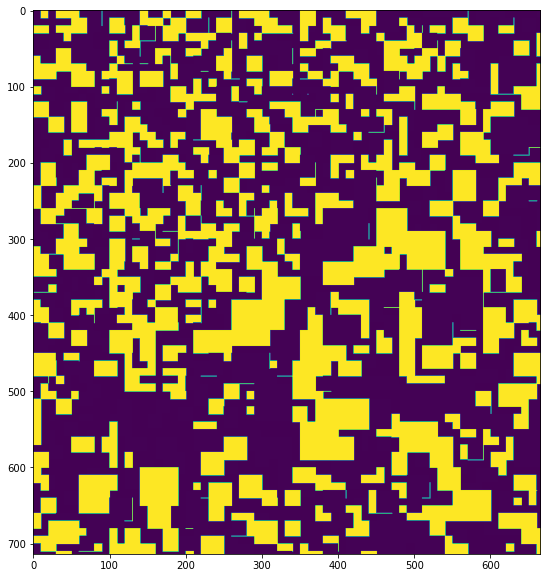

In [85]:
img_path = 'processed_data/images/2019_YELL_2_528000_4975000_image_01_01.png'
mask_path = 'processed_data/masks/2019_YELL_2_528000_4975000mask_01_01.png'
img = Image.open(img_path).convert("RGB")
# note that we haven't converted the mask to RGB,
# because each color corresponds to a different instance
# with 0 being background
mask = Image.open(mask_path)

plt.imshow(mask)

In [87]:
# let's train it for 5 epochs
from torch.optim.lr_scheduler import StepLR
num_epochs = 5

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [0]  [  0/466]  eta: 0:17:43  lr: 0.000016  loss: 0.5709 (0.5709)  loss_classifier: 0.0322 (0.0322)  loss_box_reg: 0.0207 (0.0207)  loss_mask: 0.4826 (0.4826)  loss_objectness: 0.0184 (0.0184)  loss_rpn_box_reg: 0.0169 (0.0169)  time: 2.2830  data: 0.9478  max mem: 2615
Epoch: [0]  [ 10/466]  eta: 0:09:46  lr: 0.000123  loss: 0.5925 (0.6051)  loss_classifier: 0.0332 (0.0418)  loss_box_reg: 0.0351 (0.0490)  loss_mask: 0.4826 (0.4667)  loss_objectness: 0.0113 (0.0319)  loss_rpn_box_reg: 0.0139 (0.0156)  time: 1.2859  data: 0.0962  max mem: 2615
Epoch: [0]  [ 20/466]  eta: 0:09:14  lr: 0.000231  loss: 0.5889 (0.5838)  loss_classifier: 0.0357 (0.0446)  loss_box_reg: 0.0370 (0.0535)  loss_mask: 0.4215 (0.4384)  loss_objectness: 0.0174 (0.0314)  loss_rpn_box_reg: 0.0139 (0.0159)  time: 1.1916  data: 0.0132  max mem: 2615
Epoch: [0]  [ 30/466]  eta: 0:08:56  lr: 0.000338  loss: 0.5924 (0.6009)  loss_classifier: 0.0411 (0.0484)  loss_box_reg: 0.0532 (0.0617)  loss_mask: 0.4381 (0.4480) 

In [88]:
# pick one image from the test set
img, _ = dataset_test[0]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

In [110]:
pred_img = Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

In [117]:
prediction[0]['boxes'].cpu().numpy()

array([[  4.9179688,   2.3826888, 663.7029   , 707.74744  ],
       [ 24.559954 ,   0.       , 648.95135  , 361.8187   ],
       [  6.909981 , 343.9516   , 380.79248  , 714.       ],
       [487.14008  ,  26.697412 , 666.       , 701.5675   ],
       [292.9155   ,  10.608868 , 666.       , 619.945    ]],
      dtype=float32)